In [1]:
import numpy as np
import matplotlib.pyplot as plt

# [2.3] Least Squarea and Nearest Neighbors

## Data generating distributions

Setup: A binary classification problem with input $X = [X_1, X_2]$ and categorical output variable $G \in [A,B]$

**Scenario 1:** The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.

**Breakdown:** 

1. *Uncorrelated components* - no linear relationships between $X_1$ and $X_2$
2. *Distinct means* - distributions generating the datapoints for the two classes are centered at different locations

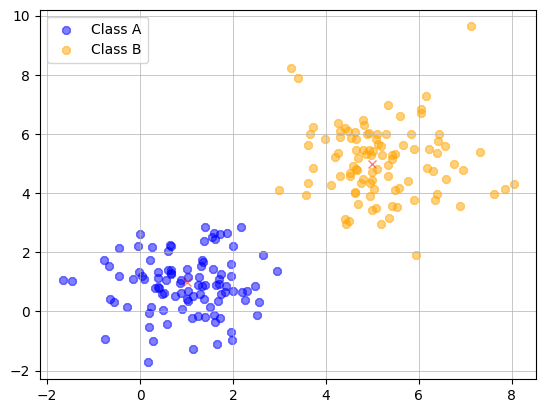

In [2]:
# class A

mean_a = [1,1]
cov_a = [[1, 0], [0, 1]]
X_a = np.random.multivariate_normal(mean=mean_a, cov=cov_a, size=100)

# class B

mean_b = [5,5]
cov_b = [[1, 0], [0, 1]]
X_b = np.random.multivariate_normal(mean=mean_b, cov=cov_b, size=100)

plt.scatter(X_a[:,0], X_a[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.plot(mean_a[1], mean_a[0], 'rx', alpha=0.5)
plt.scatter(X_b[:,0], X_b[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.plot(mean_b[1], mean_b[0], 'rx', alpha=0.5)
plt.legend(loc=2)
plt.grid(True, linewidth=0.5)
plt.show()

In [ ]:
# all predictors
_X = np.vstack([X_a, X_b])
# X is currently N datapoints where each datapoint is [X_1, X_2]
# add intercept [X_0, X_1, X_2]
X = np.column_stack([np.ones(_X.shape[0]), _X])

# ground truth - class A: -1, class B: 1
y = np.concatenate([-np.ones(100), np.ones(100)])

# the decision bounday will have the equation: w_0 + w_1*X_1 + w_2*X_2 = 0
# NOTE: if the classes were encoded as 0 and 1, then the decision boundary
# will be where the model outputs 0.5, so the equation becomes: w_0 + w_1*X_1 + w_2*X_2 = 0.5

In [4]:
# least squares closed form solution
w_optim = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"Intercept: {w_optim[0]}")
print(f"Coefficients: {w_optim[1:]}")

Intercept: -1.3057061679168054
Coefficients: [0.24194401 0.18701723]


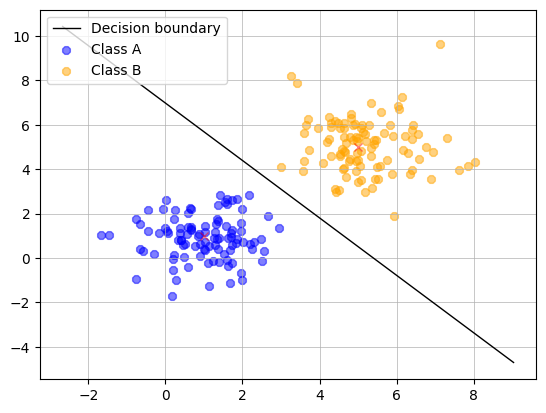

In [ ]:
# plot the line with equation w_0 + w_1*X_1 + w_2*X_2 = 0
x1 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 100)
if abs(w_optim[2]) > 1e-12:
    x2 = -(w_optim[1] * x1 + w_optim[0]) / w_optim[2]
    plt.plot(x1, x2, 'k-', linewidth=1, label='Decision boundary')
else:
    x_vert = -w_optim[0] / w_optim[1]
    plt.axvline(x=x_vert, color='k', linewidth=1, label='Decision boundary (vertical)')

plt.scatter(X_a[:,0], X_a[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.plot(mean_a[1], mean_a[0], 'rx', alpha=0.5)
plt.scatter(X_b[:,0], X_b[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.plot(mean_b[1], mean_b[0], 'rx', alpha=0.5)
plt.legend(loc=2)
plt.grid(True, linewidth=0.5)
plt.show()

**Scenario 2:** The training data in each class came from a mixture of 10 low-variance Gaussians, with individual means themselves distributed as Gaussian.

**Breakdown:** 

1. *Low-variance Gaussians* - samples from that Gaussian cluster tightly
2. *Mixture of Gaussians* - a fraction of the total number of datapoints are generated by one component Gaussian of the mixture

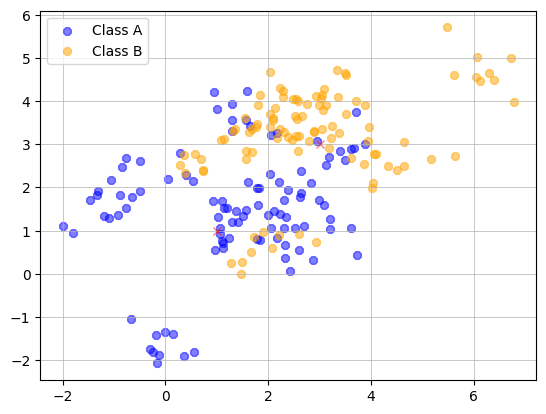

In [6]:
def generate_points_per_class(global_mean, global_var, cluster_var, num_components=10, samples_per_component=10):
    # global_mean: center of all component means
    # global_var: variance of distribution for component means
    # cluster_var: variance of each small Gaussian component
    # num_component: num of components in the MoG
    # samples_per_component: num of datapoints to be generated per component

    means = np.random.multivariate_normal(global_mean, np.eye(2)*global_var, num_components)
    data = []
    for m in means:
        samples = np.random.multivariate_normal(m, np.eye(2)*cluster_var, samples_per_component)
        data.append(samples)
    return np.vstack(data)

# class A
mean_a = [1,1]
X_a = generate_points_per_class(global_mean=mean_a, global_var=2, cluster_var=0.2, num_components=10, samples_per_component=10)
# class B
mean_b = [3,3]
X_b = generate_points_per_class(global_mean=mean_b, global_var=2, cluster_var=0.2, num_components=10, samples_per_component=10)

plt.scatter(X_a[:,0], X_a[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.plot(mean_a[1], mean_a[0], 'rx', alpha=0.5)
plt.scatter(X_b[:,0], X_b[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.plot(mean_b[1], mean_b[0], 'rx', alpha=0.5)
plt.legend(loc=2)
plt.grid(True, linewidth=0.5)
plt.show()

Intercept: -0.9880477372939336
Coefficients: [0.14894622 0.28655319]


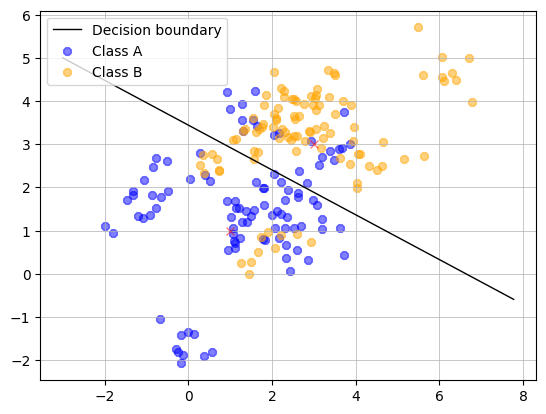

In [ ]:
# all predictors
_X = np.vstack([X_a, X_b])
# X is currently N datapoints where each datapoint is [X_1, X_2]
# add intercept [X_0, X_1, X_2]
X = np.column_stack([np.ones(_X.shape[0]), _X])

# ground truth - class A: -1, class B: 1
y = np.concatenate([-np.ones(100), np.ones(100)])

# least squares closed form solution
w_optim = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(f"Intercept: {w_optim[0]}")
print(f"Coefficients: {w_optim[1:]}")

# plot the line with equation w_0 + w_1*X_1 + w_2*X_2 = 0

x1 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 100)
if abs(w_optim[2]) > 1e-12:
    x2 = -(w_optim[1] * x1 + w_optim[0]) / w_optim[2]
    plt.plot(x1, x2, 'k-', linewidth=1, label='Decision boundary')
else:
    x_vert = -w_optim[0] / w_optim[1]
    plt.axvline(x=x_vert, color='k', linewidth=1, label='Decision boundary (vertical)')

plt.scatter(X_a[:,0], X_a[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.plot(mean_a[1], mean_a[0], 'rx', alpha=0.5)
plt.scatter(X_b[:,0], X_b[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.plot(mean_b[1], mean_b[0], 'rx', alpha=0.5)
plt.legend(loc=2)
plt.grid(True, linewidth=0.5)
plt.show()

**Oracle**: "First we generated 10 means $m_k$ from a bivariate Gaussian distribution $N((1,0)^T, \mathbf{I})$ and labeled this class A. Similarly, 10 more were drawn from $N((0,1)^T, \mathbf{I})$ and labeled class B. Then for each class we generated 100 observations as follows: for each observation, we picked an $m_k$ at random with probability 1/10, and then generated a $N(m_k, \mathbf{I}/5)$, thus leading to a mixture of Gaussian clusters for each class."

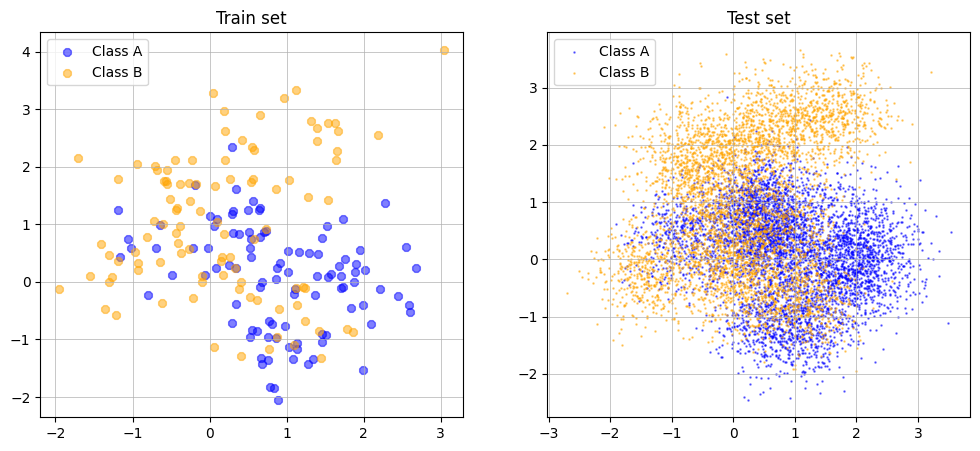

In [15]:
np.random.seed(100)

# cluster means
m_k_a = np.random.multivariate_normal(mean=[1,0], cov=np.eye(2), size=10)
m_k_b = np.random.multivariate_normal(mean=[0,1], cov=np.eye(2), size=10)

# there's a 10% probability of choosing any of the means
mean_proba = [0.1 for _ in range(10)]
cluster_cov = np.eye(2) / 5

### training set ###
N_train = 200
X_a_train, X_b_train = [], []
for _ in range(N_train // 2):
    mu_a = m_k_a[np.random.choice(np.arange(10), p=mean_proba)]
    X_a_train.append(np.random.multivariate_normal(mu_a, cluster_cov))

    mu_b = m_k_b[np.random.choice(np.arange(10), p=mean_proba)]
    X_b_train.append(np.random.multivariate_normal(mu_b, cluster_cov))

X_a_train = np.vstack(X_a_train)
X_b_train = np.vstack(X_b_train)
_X_train = np.vstack([X_a_train, X_b_train])
y_train = np.concatenate([-np.ones(N_train // 2), np.ones(N_train // 2)])

### test set ###
N_test = 10000
X_a_test, X_b_test = [], []
for _ in range(N_test // 2):
    mu_a = m_k_a[np.random.choice(np.arange(10), p=mean_proba)]
    X_a_test.append(np.random.multivariate_normal(mu_a, cluster_cov))

    mu_b = m_k_b[np.random.choice(np.arange(10), p=mean_proba)]
    X_b_test.append(np.random.multivariate_normal(mu_b, cluster_cov))

X_a_test = np.vstack(X_a_test)
X_b_test = np.vstack(X_b_test)
_X_test = np.vstack([X_a_test, X_b_test])
y_test = np.concatenate([-np.ones(N_test // 2), np.ones(N_test // 2)])


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_a_train[:,0], X_a_train[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.scatter(X_b_train[:,0], X_b_train[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.legend(loc=2)
plt.title(f"Train set")
plt.grid(True, linewidth=0.5)

plt.subplot(1, 2, 2)
plt.scatter(X_a_test[:,0], X_a_test[:,1], c="blue", marker="8", alpha=0.5, label="Class A", s=0.75)
plt.scatter(X_b_test[:,0], X_b_test[:,1], c="orange", marker="8", alpha=0.5, label="Class B", s=0.75)
plt.legend(loc=2)
plt.title(f"Test set")
plt.grid(True, linewidth=0.5)
plt.show()

Least squares parameters: 
Intercept: 0.008407165720765528
Coefficients: [-0.3159117   0.29978547]

Errors: 
Training error: 0.2800
Test error: 0.2993


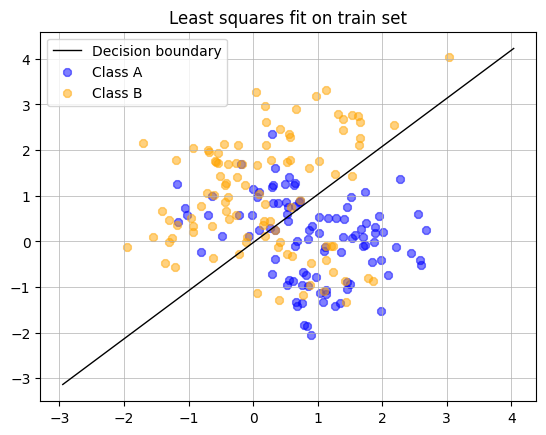

In [ ]:
# Least squares fit

# add bias term
X_train = np.column_stack([np.ones(_X_train.shape[0]), _X_train])
w_optim = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y)
print(f"Least squares parameters: ")
print(f"Intercept: {w_optim[0]}")
print(f"Coefficients: {w_optim[1:]}")

# plot the line with equation w_0 + w_1*X_1 + w_2*X_2 = 0
x1 = np.linspace(X_train[:,1].min() - 1, X_train[:,1].max() + 1, 100)
if abs(w_optim[2]) > 1e-12:
    x2 = -(w_optim[1] * x1 + w_optim[0]) / w_optim[2]
    plt.plot(x1, x2, 'k-', linewidth=1, label='Decision boundary')
else:
    x_vert = -w_optim[0] / w_optim[1]
    plt.axvline(x=x_vert, color='k', linewidth=1, label='Decision boundary (vertical)')

plt.scatter(X_a_train[:,0], X_a_train[:,1], c="blue", marker="8", alpha=0.5, label="Class A")
plt.scatter(X_b_train[:,0], X_b_train[:,1], c="orange", marker="8", alpha=0.5, label="Class B")
plt.legend(loc=2)
plt.title(f"Least squares fit on train set")
plt.grid(True, linewidth=0.5)

print(f"\nErrors: ")
# training error
y_pred_train = np.sign(X_train.dot(w_optim))
ls_train_error = np.mean(y_pred_train != y)
print(f"Training error: {ls_train_error:.4f}")

# test error
X_test = np.column_stack([np.ones(_X_test.shape[0]), _X_test])
y_pred_test = np.sign(X_test.dot(w_optim))
ls_test_error = np.mean(y_pred_test != y_test)
print(f"Test error: {ls_test_error:.4f}")

plt.show()

**Linear regression fit from scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(_X_train, y_train) # X: N,2, Y: N,
print(f"Least squares parameters: ")
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients: {reg.coef_}")

print(f"\nErrors: ")
# training error
y_pred_train = np.sign(reg.predict(_X_train))
ls_train_error = np.mean(y_pred_train != y)
print(f"Training error: {ls_train_error:.4f}")

# test error
y_pred_test = np.sign(reg.predict(_X_test))
ls_test_error = np.mean(y_pred_test != y_test)
print(f"Test error: {ls_test_error:.4f}")

plt.show()

Least squares parameters: 
Intercept: 0.008407165720765525
Coefficients: [-0.3159117   0.29978547]

Errors: 
Training error: 0.2800
Test error: 0.2993


**kNN classifier**

In [22]:
def kNN(X_train, y_train, X_test, k):
    """
    Predict the labels of samples in X_test based on their nearest neighbors' in X_train
    """
    y_test = []

    for sample in X_test:

        # distances to all training points
        l2_distances = np.linalg.norm(X_train - sample, axis=1)
        
        # get indices of k smallest distances
        knn_idx = np.argsort(l2_distances)[:k]

        # majority vote (sign of the sum of neighbor labels)
        y_test.append(np.sign(np.sum(y_train[knn_idx])))
    
    return np.array(y_test)

k = 5

# training error
y_pred_train = kNN(X_train=_X_train, y_train=y_train, X_test=_X_train, k=5)
knn_train_error = np.mean(y_pred_train != y)
print(f"Training error: {knn_train_error:.4f}")

# test error
y_pred_test = kNN(X_train=_X_train, y_train=y_train, X_test=_X_test, k=5)
knn_test_error = np.mean(y_pred_test != y_test)
print(f"Test error: {knn_test_error:.4f}")


Training error: 0.1750
Test error: 0.2584


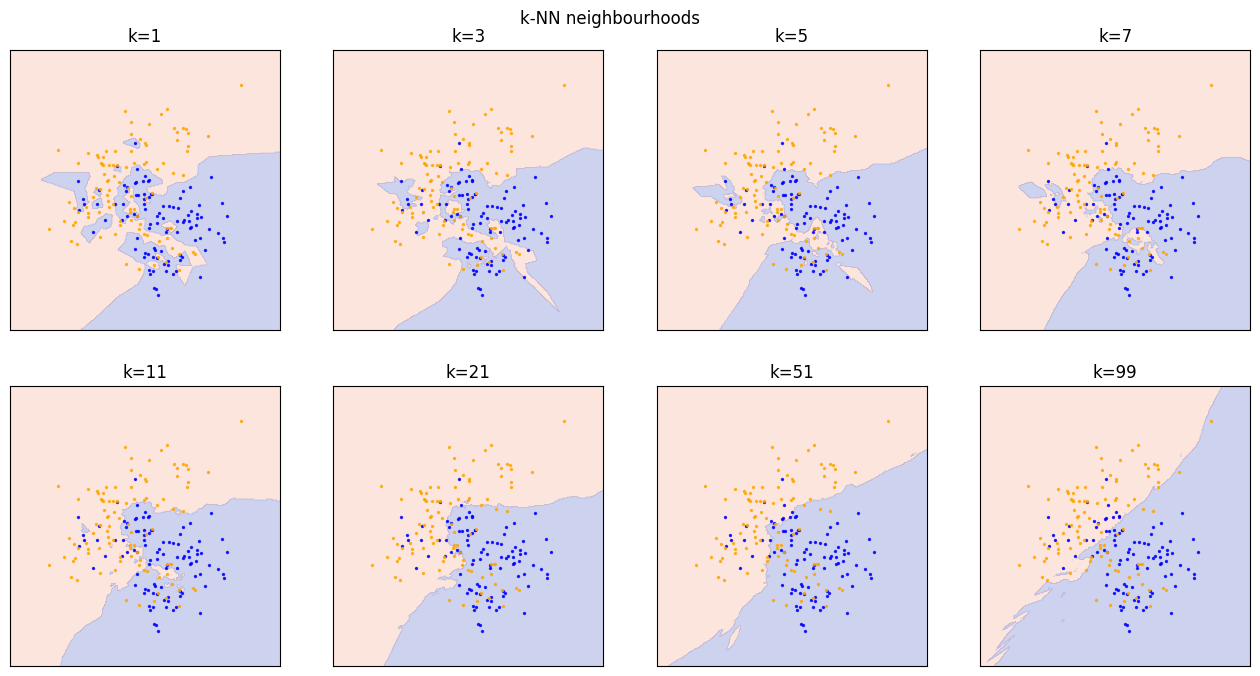

In [41]:
# kNN classifier neighbourhoods for different k values
x_min, x_max = _X_train[:, 0].min() - 1, _X_train[:, 0].max() + 1
y_min, y_max = _X_train[:, 1].min() - 1, _X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# stack grid points and predict
grid_points = np.c_[xx.ravel(), yy.ravel()]
k_list = [1,3,5,7,11,21,51,99]
ncols = 4
nrows = len(k_list) // ncols
plt.figure(figsize=(16, 8))
for i, k in enumerate(k_list):
    Z = kNN(_X_train, y_train, grid_points, k=k)
    Z = Z.reshape(xx.shape)
    plt.subplot(nrows, ncols, i+1)
    plt.contourf(xx, yy, Z, levels=[-1,0,1], extend="both",alpha=0.25, cmap="coolwarm")

    plt.scatter(X_a_train[:, 0], X_a_train[:, 1], c="blue", marker="o", label="Class A", alpha=0.8, s=2)
    plt.scatter(X_b_train[:, 0], X_b_train[:, 1], c="orange", marker="o", label="Class B", alpha=0.8, s=2)
    plt.title(f"k={k}")
    plt.grid(True, linewidth=0.5)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("k-NN neighbourhoods", y=0.93)
plt.show()

## Bayes error rate

Lowest possible classification error. For a classification task can be defined as: $1 - E \left( \max\limits_{j} P(Y=j|X) \right)$

Idea: \
(1) Given the oracle data generating distribution, sample N Monte Carlo samples \
(2) For each sample, compute the class probabilities:
\begin{equation*}
    p_A(x) = \frac{1}{10} \sum\limits_{k=1}^{10} \mathcal{N} \left( x; m_k^A, \Sigma \right), \quad
    p_B(x) = \frac{1}{10} \sum\limits_{k=1}^{10} \mathcal{N} \left( x; m_k^B, \Sigma \right)
\end{equation*}
where the Gaussian p.d.f. centered at $\mu$ is given by
\begin{equation*}
    \mathcal{N}(x; \mu, \Sigma) = \frac{1}{2\pi\sqrt{\left|\Sigma\right|}}\exp \left( - \frac{1}{2} \left(x - \mu\right)^\intercal \Sigma^{-1} \left(x - \mu\right) \right)
\end{equation*}
(3) Monte Carlo estimate of the Bayes error: \
For two classes with equal prior, the true Bayes error rate:
\begin{equation*}
    P_e = \int \min \left( \frac{1}{2} p_A(x), \frac{1}{2} p_B(x) \right) = \frac{1}{2} \int \min \left( p_A(x), p_B(x) \right)
\end{equation*}

With MC integration, we sample from the data generating distribution $r(x)$
\begin{equation*}
    r(x) = \frac{1}{2} p_A(x) + \frac{1}{2} p_B(x)
\end{equation*}

Following the approximation:
\begin{equation*}
    \int f(x)dx = \mathbb{E} \left[ \frac{f(x)}{r(x)} \right]
\end{equation*}

Therefore, Bayes error rate:
\begin{equation*}
    P_e = \frac{1}{2} \int \min (p_A(x), p_B(x))dx = \frac{1}{2} \mathbb{E} \left[ \frac{\min \left( p_A(x), p_B(x) \right)}{r(x)} \right] = \frac{1}{2} \mathbb{E} \left[ \frac{\min \left( p_A(x), p_B(x) \right)}{\frac{1}{2} p_A(x) + \frac{1}{2} p_B(x)} \right] = \mathbb{E} \left[ \frac{\min \left( p_A(x), p_B(x) \right)}{ p_A(x) + p_B(x)} \right]
\end{equation*}

The term $\frac{\min \left( p_A(x), p_B(x) \right)}{ p_A(x) + p_B(x)}$ is the posterior probability of misclassifying a single sample x

In [ ]:
np.random.seed(100)

# generate samples
N = 200_000

X_samples = []
for i in range(N):
    cluster_idx = np.random.choice(np.arange(len(m_k_a)), p=mean_proba)
    if np.random.rand() < 0.5:  # class A
        mu = m_k_a[cluster_idx]
    else:                       # class B
        mu = m_k_b[cluster_idx]
    X_samples.append(np.random.multivariate_normal(mu, cluster_cov))

X_samples = np.vstack(X_samples)    # N,2


# now compute the conditional probability P(Y=j|X) for each datasample in X
inv_cov = np.linalg.inv(cluster_cov)
det_cov = np.linalg.det(cluster_cov)
norm = 1 / (2 * np.pi * np.sqrt(det_cov))

def gaussian_pdf(x, mu):
    # compute the Gaussian pdf at datapoint `x`, centered at `mu`
    diff = x - mu
    # `diff @ cov` - apply inverse covariance to each sample
    # `* diff` - elementwise multiply the 2D vectors
    # np.sum(..., axis=1) - sum the columns per sample to a scalar
    exponent = -0.5 * np.sum(diff @ inv_cov * diff, axis=1)
    
    return norm * np.exp(exponent)

def p_mix(x, means):
    # x: N,2
    # means: MoG component means
    return np.mean([gaussian_pdf(x,mu) for mu in means], axis=0)

p_A = p_mix(X_samples, m_k_a)   # N,
p_B = p_mix(X_samples, m_k_b)   # N,

# average misclassification error (assuming each sample is assigned to the higher probability class)
misclassification_proba = np.minimum(p_A, p_B)  # elementwise min
bayes_error = np.mean(misclassification_proba / (p_A + p_B))
print("Estimated Bayes error:", bayes_error)

Estimated Bayes error: 0.23396645182131368


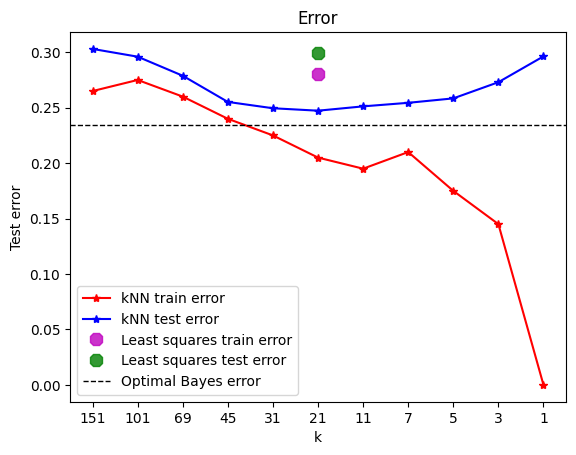

In [ ]:
# plot errors

# kNN errors
training_errors = []
test_errors = []
k_list = [1, 3,5,7,11,21,31,45,69,101,151]
for k in k_list:
    y_train_pred = kNN(_X_train, y_train, _X_train, k)
    train_err = np.mean(y_train_pred != y_train)
    training_errors.append(train_err)

    y_test_pred = kNN(_X_train, y_train, _X_test, k)
    test_err = np.mean(y_test_pred != y_test)
    test_errors.append(test_err)

plt.plot(training_errors[::-1], 'r*-', label='kNN train error')
plt.plot(test_errors[::-1], 'b*-', label='kNN test error')
plt.plot(5, ls_train_error, 'm8', markersize=10, alpha=0.8, label="Least squares train error")
plt.plot(5, ls_test_error, 'g8', markersize=10, alpha=0.8, label="Least squares test error")
plt.axhline(y=bayes_error, color='k', linestyle='--', linewidth=1, label='Optimal Bayes error')
plt.title(f"Error")
plt.legend(loc=3)
plt.xticks(ticks=np.arange(len(k_list)), labels=k_list[::-1])
plt.xlabel("k")
plt.ylabel("Test error")

plt.show()